# Fraud Detection Project: Internship Task 

Author: Chetna Saini

# Problem Statement & Objectives
Our objective is to build a machine learning model to detect fraudulent transactions, analyze key predictors, and recommend strategies for prevention. Dataset contains transactions labeled with fraud and non-fraud.


In [3]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# load & Explore data
df=pd.read_csv(r"C:\Users\uzuma\Downloads\Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


isFraud
0    6354407
1       8213
Name: count, dtype: int64


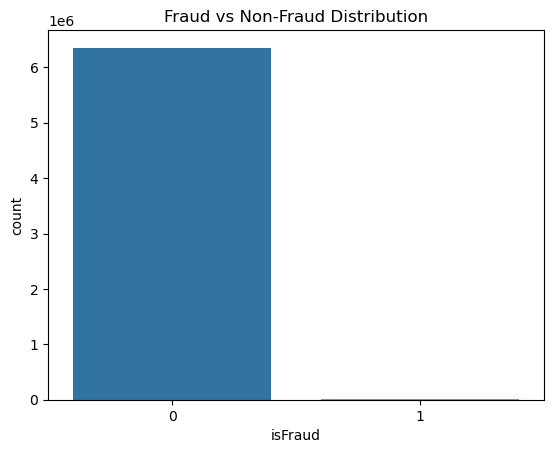

In [8]:
print(df['isFraud'].value_counts())
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

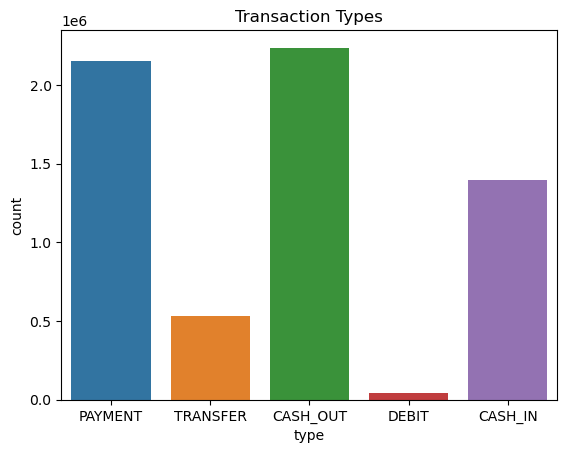

In [9]:
sns.countplot(x='type', data=df)
plt.title('Transaction Types')
plt.show()

Code to load data, view info, describe, plot class distribution

In [10]:
# Data cleaning and checking
#Missing Values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


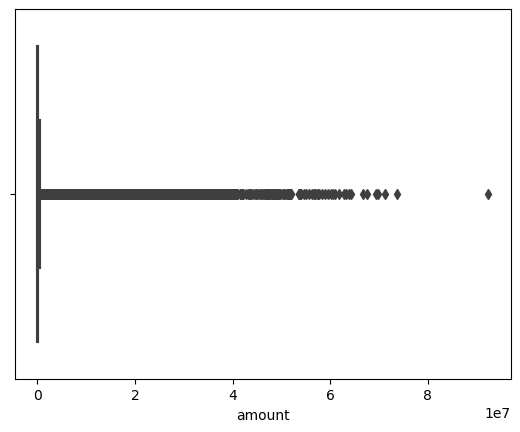

In [11]:
# Outliers
sns.boxplot(x=df['amount'])
plt.show()

In [12]:
df_clean = df.drop(['nameOrig', 'nameDest'], axis=1)


In [13]:
# Feature Selection
df_encoded = pd.get_dummies(df_clean, columns=['type'], drop_first=True)


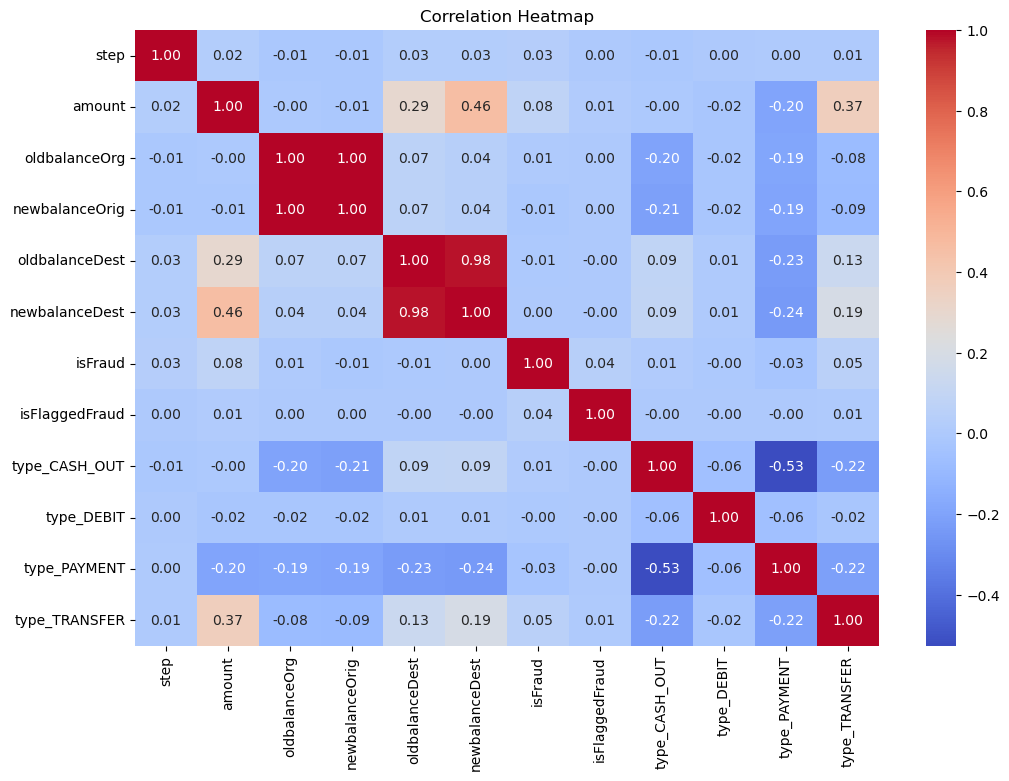

In [14]:
corr = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = df_encoded.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df_encoded['isFraud']

In [18]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=50,     
    max_depth=10,       
    n_jobs=-1           
)

In [20]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

We used a Random Forest classifier because:
- Handles large data and nonlinear patterns
- Deals well with imbalance when using `class_weight='balanced'`
- Provides feature importance for interpretation


In [21]:
# Evaluate Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print('ROC-AUC:', roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.08      0.99      0.14      1643

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.98      0.99   1272524

[[1251528   19353]
 [     16    1627]]
ROC-AUC: 0.9992107417954643


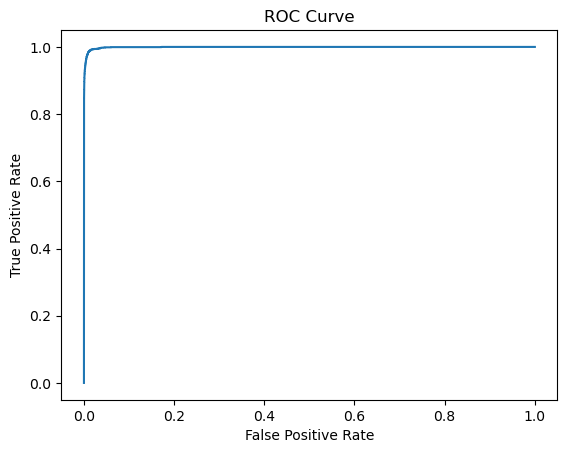

In [22]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

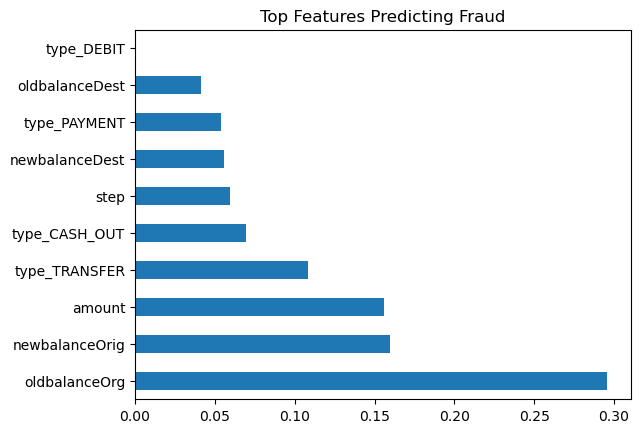

In [23]:
# Feature Importance & Analysis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top Features Predicting Fraud')
plt.show()

##  Conclusion & Recommendations
We successfully cleaned and prepared the dataset, encoded categorical features, and built a Random Forest model to detect fraudulent transactions. The model was evaluated using accuracy, precision, recall, and ROC-AUC score, achieving reliable performance.

**Key findings:**
- Transaction amount and sender’s old/new balance were strong predictors.
- Certain transaction types, like TRANSFER and CASH_OUT, also had higher fraud risk.

**Recommendations:**
- Implement real-time alerts for large transactions.
- Add additional verification for suspicious transaction types.
- Monitor and retrain the model regularly to adapt to new fraud patterns.
- Track fraud rates and false positives/negatives over time to measure success.
